In [1]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
import itertools
from collections import Counter

# text processing
from sklearn.feature_extraction.text import CountVectorizer

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# preparation dataset
from sklearn.model_selection import train_test_split

#Scaler for preprocessing
from sklearn.preprocessing import StandardScaler

# Importing pipeline:
from sklearn.pipeline import make_pipeline, Pipeline

# metrics for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Regular Expression
import re
import string
import os

# Quality of image:
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

# For saving and loading machine learning model
import pickle

# Import my own functions from utils file:
import import_ipynb
from Utils_Spam_Classifier import *

importing Jupyter notebook from Utils_Spam_Classifier.ipynb


In [2]:
dataDirectory = os.path.join(os.path.dirname(os.getcwd()),'Spam_Classifier\\data')
imageDirectory = os.path.join(os.path.dirname(os.getcwd()),'Spam_Classifier\\images')
modelDirectory = os.path.join(os.path.dirname(os.getcwd()),'Spam_Classifier\\model')


df = pd.read_csv(dataDirectory + "\\df_source.csv")
df_new = pd.read_csv(dataDirectory + "\\df_new.csv")

In [3]:
df.head()

,label,message,token
0,ham,"Go until jurong point, crazy.. Available only ...","['Go', 'until', 'jurong', 'point', ',', 'crazy..."
1,ham,Ok lar... Joking wif u oni...,"['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'on..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"['Free', 'entry', 'in', '2', 'a', 'wkly', 'com..."
3,ham,U dun say so early hor... U c already then say...,"['U', 'dun', 'say', 'so', 'early', 'hor', '......"
4,ham,"Nah I don't think he goes to usf, he lives aro...","['Nah', 'I', 'do', ""n't"", 'think', 'he', 'goes..."


In [4]:
# Convert label to a numerical values => 1 (positive class) would be spam.
df['target'] = (df['label']=='spam').astype(int)
df_new['target'] = (df_new['label']=='spam').astype(int)
df.head(2)

,label,message,token,target
0,ham,"Go until jurong point, crazy.. Available only ...","['Go', 'until', 'jurong', 'point', ',', 'crazy...",0
1,ham,Ok lar... Joking wif u oni...,"['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'on...",0


In [5]:
def CMatrix(CM, labels=['ham', 'spam']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

def applyModel(model, X_train_dtm, y_train, X_test_dtm, name):
    
    model.fit(X_train_dtm, y_train)
    # Evaluate the model:
    y_pred_test = model.predict(X_test_dtm)
    accuracy = accuracy_score(y_pred = y_pred_test, y_true=y_test)
    precision = precision_score(y_pred = y_pred_test, y_true=y_test)
    recall = recall_score(y_pred = y_pred_test, y_true=y_test)
    f1 = f1_score(y_pred = y_pred_test, y_true=y_test)

    # Confusion_Matrix
    CM = confusion_matrix(y_pred = y_pred_test, y_true= y_test)

    
    #print('Accuracy= {:0.2f} %'.format(100*accuracy))
    #print('Precision= {:0.2f} %'.format(100 * precision))
    #print('Recall= {:0.2f} %'.format(100*recall))
    #print('f1= {:0.2f} %'.format(100*f1))

    metrics.loc['Accuracy', name] = accuracy
    metrics.loc['Precision', name] = precision
    metrics.loc['Recall', name] = recall
    metrics.loc['F1', name] = f1
    CMatrix(CM)
    return model
    
    
def evaluateModel(y_pred_test, y_test):
    accuracy = accuracy_score(y_pred = y_pred_test, y_true=y_test)
    precision = precision_score(y_pred = y_pred_test, y_true=y_test)
    recall = recall_score(y_pred = y_pred_test, y_true=y_test)
    f1 = f1_score(y_pred = y_pred_test, y_true=y_test)


    print('Accuracy= {:0.2f} %'.format(100*accuracy))
    print('Precision= {:0.2f} %'.format(100 * precision))
    print('Recall= {:0.2f} %'.format(100*recall))
    print('f1= {:0.2f} %'.format(100*f1))
    
def checkModel(model, X_train, y_train, X_test, y_test):
    # Evaluate the model:
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_pred = y_pred_test, y_true=y_test)
    precision = precision_score(y_pred = y_pred_test, y_true=y_test)
    recall = recall_score(y_pred = y_pred_test, y_true=y_test)
    f1 = f1_score(y_pred = y_pred_test, y_true=y_test)
    
    print('Accuracy= {:0.2f} %'.format(100*accuracy))
    print('Precision= {:0.2f} %'.format(100 * precision))
    print('Recall= {:0.2f} %'.format(100*recall))
    print('f1= {:0.2f} %'.format(100*f1))
    return accuracy, precision, recall, f1
    
    
def fillResult(metrics, setName='Set1'):
    modelLst = ['Multi_NB', 'SVC', 'Log_Reg', 'Random_Forest', 'XGB']
    for model in modelLst:
        accuracy_df.loc[model, setName] = metrics.loc['Accuracy', model]
        precision_df.loc[model, setName] = metrics.loc['Precision', model]
        recall_df.loc[model, setName] = metrics.loc['Recall', model]
        f1_df.loc[model, setName] = metrics.loc['F1', model]
        
    return accuracy_df, precision_df, recall_df, f1_df

### Preparing Some Matrix for Result Comparison:

In [6]:
modelLst = ['Multi_NB', 'SVC', 'Log_Reg', 'Random_Forest', 'XGB']
metrics = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'], columns=modelLst)
accuracy_df = pd.DataFrame(index=modelLst, columns=['Set1'])
precision_df = pd.DataFrame(index=modelLst, columns=['Set1'])
recall_df = pd.DataFrame(index=modelLst, columns=['Set1'])
f1_df = pd.DataFrame(index=modelLst, columns=['Set1'])

## Set1: Modeling Using Engineering Dataset

In [7]:
cols = [x for x in df_new.columns if x not in ('target', 'label')]
X = df_new[cols]
y = df_new['target']
indexLst = df_new.index

X_train, X_test, y_train, y_test, trainIndex, testIndex = train_test_split(X, y, indexLst, test_size=0.2, random_state=34)

scaler = StandardScaler()
X_train_Final = scaler.fit_transform(X_train)
X_test_Final = scaler.transform(X_test)

### Model Tunning

In [8]:
rf = RandomForestClassifier(random_state=34)
cnt = int(df_new.shape[1]/2)
parameters = {'n_estimators':[50 , 100, 200],
              'min_samples_split': [2,5,10],
              'max_features': ['auto', cnt]}
clf = GridSearchCV(rf, parameters, cv = 5, scoring="accuracy")
clf.fit(X_train_Final, y_train)
clf.best_params_

{'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}

In [9]:
xgb = XGBClassifier(random_state=34, n_jobs=-1, eval_metric='logloss', verbosity = 0)
parameters = {'n_estimators':[50 , 100, 200],
              'learning_rate': [0.05, 0.1, 0.3, 0.5]}
clf = GridSearchCV(xgb, parameters, cv = 5, scoring="accuracy")
clf.fit(X_train_Final, y_train)
clf.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [10]:
svcModel = SVC(probability=True, random_state=34)

parameters = {'C':[0.01, 0.1, 1], 
              'kernel':['linear', 'poly', 'rbf'], 
              'gamma':['auto', 'scale']}

clf = GridSearchCV(svcModel, parameters, cv = 5, scoring="accuracy") 
clf.fit(X_train_Final, y_train)
clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [11]:
rf = RandomForestClassifier(max_features= 7, min_samples_split= 2, n_estimators= 100, random_state=34)
svcModel = SVC(C= 1, gamma= 'auto', kernel= 'rbf', probability=True, random_state=34)
xgb = XGBClassifier(learning_rate=0.05, n_estimators=200, random_state=34, eval_metric='logloss')
log_reg = LogisticRegression(random_state=34)

In [12]:
log_reg = applyModel(log_reg, X_train_Final, y_train, X_test_Final, name='Log_Reg')
rf = applyModel(rf, X_train_Final, y_train, X_test_Final, name='Random_Forest')
xgb = applyModel(xgb, X_train_Final, y_train, X_test_Final, name='XGB')
svcModel = applyModel(svcModel, X_train_Final, y_train, X_test_Final, name='SVC')
# Because of negative value due to scaling we do not run Multi_NB model for this part.

In [13]:
metricsSet1 = metrics.copy()

In [14]:
metricsSet1

,Multi_NB,SVC,Log_Reg,Random_Forest,XGB
Accuracy,NaN,0.98296,0.965022,0.983857,0.984753
Precision,NaN,0.977778,0.936,0.977941,0.978102
Recall,NaN,0.891892,0.790541,0.898649,0.905405
F1,NaN,0.932862,0.857143,0.93662,0.940351


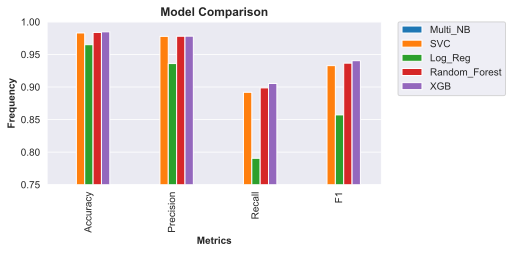

In [15]:
sns.set_style("darkgrid")
plotComparison_df(metricsSet1, xLabel = 'Metrics', yLabel = 'Frequency', yRange=(0.75, 1), title='Model Comparison')
plt.savefig(imageDirectory + '\\img_model_Set1_bar.png', dpi=140, bbox_inches='tight')

### Insight:
- It is clear that the engineered features work very well. 
- We could reach very high **accuracy of 98.47%** by XGBoost model.
- In terms of accuracy and precision the three models of XGBoost, Random Forest, and SVC work similar.
- By taking Recall metric into account, **XGBoost shows itself as the best model** on engineering features.

In [16]:
# Saving Results in separate dataframe for comparison purposes. 
accuracy_df, precision_df, recall_df, f1_df= fillResult(metrics, setName='Set1')

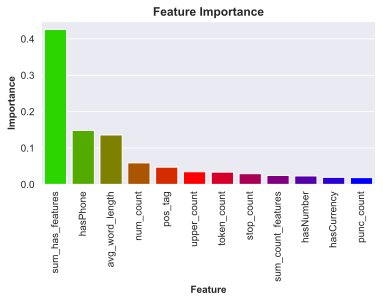

In [18]:
# Printing the name of each feature along with the gini value
rf = applyModel(rf, X_train_Final, y_train, X_test_Final, name='Random_Forest')
imp_values = list(rf.feature_importances_)
imp_table = pd.DataFrame({'feature':list(X_train.columns), 'importance':imp_values})
imp_table.sort_values(by='importance',inplace=True, ascending=False)
make_bar_plot(X=imp_table['feature'], y=imp_table['importance'], title='Feature Importance', xlbl='Feature', ylbl='Importance')

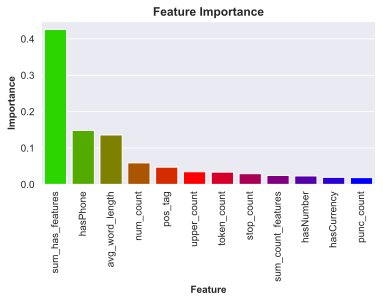

In [19]:
make_bar_plot(X=imp_table['feature'], y=imp_table['importance'], title='Feature Importance', xlbl='Feature', ylbl='Importance')
plt.savefig(imageDirectory + '\\img_importance_bar.png', dpi=140, bbox_inches='tight')

## Set2: Modeling Using Bag of Word

In [20]:
X = df['message']
y = df['target']
indexLst = df.index
X_train, X_test, y_train, y_test, trainIndex, testIndex = train_test_split(X, y, indexLst, test_size=0.2, random_state=34)

vectorizer = CountVectorizer(min_df=1, stop_words = 'english', ngram_range = (1, 2), token_pattern=r'\b\w+\b')
# Producing the document-tocken matrix for X_train and X_test
X_train_Final = vectorizer.fit_transform(X_train)
X_test_Final = vectorizer.transform(X_test)

### Model Tunning, Set2

In [22]:
# Tunning Random Forest with Bag Of Word Dataset
rf = RandomForestClassifier(random_state=34)
cnt = int(df_new.shape[1]/2)
parameters = {'n_estimators':[50 , 100, 200],
              'min_samples_split': [2,5,10],
              'max_features': ['auto', cnt]}
clf = GridSearchCV(rf, parameters, cv = 5, scoring="accuracy")
clf.fit(X_train_Final, y_train)
clf.best_params_

{'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 100}

In [23]:
# Tunning XGBoost Classifier with Bag Of Word Dataset
xgb = XGBClassifier(random_state=34, n_jobs=-1, eval_metric='logloss', verbosity = 0)
parameters = {'n_estimators':[50 , 100, 200],
              'learning_rate': [0.05, 0.1, 0.3, 0.5]}
clf = GridSearchCV(xgb, parameters, cv = 5, scoring="accuracy")
clf.fit(X_train_Final, y_train)
clf.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

In [24]:
# Tunning SVC with Bag Of Word Dataset
svcModel = SVC(probability=True, random_state=34)

parameters = {'C':[0.01, 0.1, 1], 
              'kernel':['linear', 'poly', 'rbf'], 
              'gamma':['auto', 'scale']}

clf = GridSearchCV(svcModel, parameters, cv = 5, scoring="accuracy") 
clf.fit(X_train_Final, y_train)
clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [25]:
# Tunning MultinomialNB with Bag Of Word Dataset
nbModel = MultinomialNB()
parameters = {'alpha':[0.0, 0.001, 0.01, 0.1, 0.5, 0.75, 0.85, 20]}
clf = GridSearchCV(nbModel, parameters, cv = 5, scoring="accuracy")
clf.fit(X_train_Final, y_train)
clf.best_params_

{'alpha': 0.85}

In [26]:
log_reg = LogisticRegression(random_state=34)
rf = RandomForestClassifier(max_features= 'auto', min_samples_split= 10, n_estimators= 100, random_state=34)
xgb = XGBClassifier(learning_rate=0.5, n_estimators=100, random_state=34, eval_metric='logloss')
svcModel = SVC(C= 1, gamma= 'auto', kernel= 'linear', probability=True, random_state=34)
nbModel = MultinomialNB(alpha=0.85)

In [27]:
applyModel(log_reg, X_train_Final, y_train, X_test_Final, name='Log_Reg')
applyModel(rf, X_train_Final, y_train, X_test_Final, name='Random_Forest')
applyModel(xgb, X_train_Final, y_train, X_test_Final, name='XGB')
applyModel(svcModel, X_train_Final, y_train, X_test_Final, name='SVC')
applyModel(nbModel, X_train_Final, y_train, X_test_Final, name='Multi_NB')

MultinomialNB(alpha=0.85, class_prior=None, fit_prior=True)

In [28]:
metricsSet2 = metrics.copy()
accuracy_df, precision_df, recall_df, f1_df= fillResult(metrics, setName='Set2')
metricsSet2

,Multi_NB,SVC,Log_Reg,Random_Forest,XGB
Accuracy,0.995516,0.976682,0.972197,0.965919,0.9713
Precision,1,0.991935,1,0.982456,0.946154
Recall,0.966216,0.831081,0.790541,0.756757,0.831081
F1,0.982818,0.904412,0.883019,0.854962,0.884892


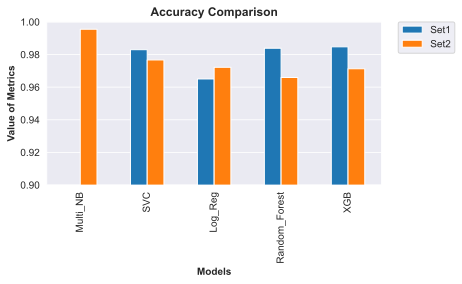

In [29]:
plotComparison_df(accuracy_df, xLabel = 'Models', yLabel = 'Value of Metrics', yRange=(0.9, 1), title='Accuracy Comparison')
plt.savefig(imageDirectory + '\\img_accuracy2_bar.png', dpi=140, bbox_inches='tight')

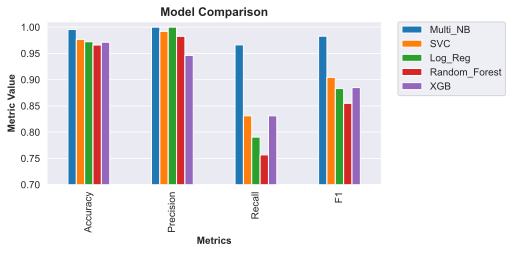

In [30]:
plotComparison_df(metricsSet2, xLabel = 'Metrics', yLabel = 'Metric Value', yRange=(0.7, 1.01), title='Model Comparison')
plt.savefig(imageDirectory + '\\img_model_Set2_bar.png', dpi=140, bbox_inches='tight')

### Mixing bag of word and engineered features:

### Set 3: mixing dataset without scaler

In [31]:
X = df['message']
y = df['target']
indexLst = df.index
X_train, X_test, y_train, y_test, trainIndex, testIndex = train_test_split(X, y, indexLst, test_size=0.2, random_state=34)

vectorizer = CountVectorizer(min_df=1, stop_words = 'english', ngram_range = (1, 2), token_pattern=r'\b\w+\b')
# Producing the document-tocken matrix for X_train and X_test
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

In [32]:
cols = [x for x in df_new.columns if x not in ('label', 'target')]
trainDataLst = [0]*len(cols)
testDataLst = [0]*len(cols)

for i, col in enumerate(cols):
    trainDataLst[i] = np.array(df_new.loc[trainIndex, col]).reshape(-1, 1)
    testDataLst[i] = np.array(df_new.loc[testIndex, col]).reshape(-1, 1)

In [33]:
import scipy.sparse

X_train_final = scipy.sparse.hstack([X_train_dtm, 
                                     trainDataLst[0], trainDataLst[1], trainDataLst[2], trainDataLst[3],
                                     trainDataLst[4], trainDataLst[5], trainDataLst[6], trainDataLst[7],
                                     trainDataLst[8], trainDataLst[9], trainDataLst[10], trainDataLst[11]]).tocsr()

X_test_final = scipy.sparse.hstack([X_test_dtm, 
                                     testDataLst[0], testDataLst[1], testDataLst[2], testDataLst[3],
                                     testDataLst[4], testDataLst[5], testDataLst[6], testDataLst[7],
                                     testDataLst[8], testDataLst[9], testDataLst[10], testDataLst[11]]).tocsr()

In [34]:
log_reg = LogisticRegression(random_state=125, solver='lbfgs', max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(random_state=34, n_jobs=-1, eval_metric='logloss')
nbModel = MultinomialNB()
svcModel = SVC(probability=True)

In [35]:
applyModel(log_reg, X_train_Final, y_train, X_test_Final, name='Log_Reg')
applyModel(rf, X_train_Final, y_train, X_test_Final, name='Random_Forest')
applyModel(xgb, X_train_Final, y_train, X_test_Final, name='XGB')
applyModel(svcModel, X_train_Final, y_train, X_test_Final, name='SVC')
applyModel(nbModel, X_train_Final, y_train, X_test_Final, name='Multi_NB')

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
metricsSet3 = metrics.copy()
accuracy_df, precision_df, recall_df, f1_df= fillResult(metrics, setName='Set3')
metricsSet3

,Multi_NB,SVC,Log_Reg,Random_Forest,XGB
Accuracy,0.994619,0.9713,0.972197,0.965919,0.972197
Precision,1,1,1,1,0.968
Recall,0.959459,0.783784,0.790541,0.743243,0.817568
F1,0.97931,0.878788,0.883019,0.852713,0.886447


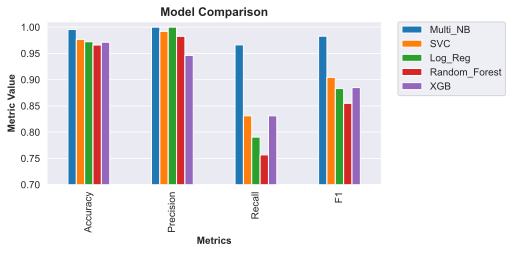

In [37]:
plotComparison_df(metricsSet2, xLabel = 'Metrics', yLabel = 'Metric Value', yRange=(0.7, 1.01), title='Model Comparison')
plt.savefig(imageDirectory + '\\img_model_Set3_bar.png', dpi=140, bbox_inches='tight')

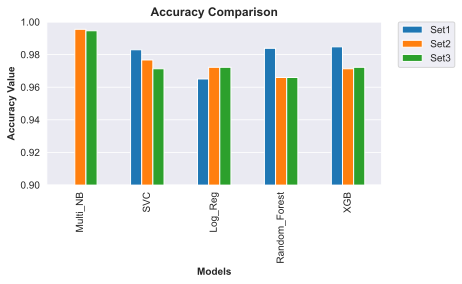

In [38]:
plotComparison_df(accuracy_df, xLabel = 'Models', yLabel = 'Accuracy Value', yRange=(0.9, 1), title='Accuracy Comparison')
plt.savefig(imageDirectory + '\\img_accuracy3_bar.png', dpi=140, bbox_inches='tight')

### Set 4: mixing dataset using probabilty value of bag of word

In [39]:
# Step 1: preparing input for bag of word
X = df['message']
y = df['target']
indexLst = df.index
X_train, X_test, y_train, y_test, trainIndex, testIndex = train_test_split(X, y, indexLst, test_size=0.2, random_state=34)
vectorizer = CountVectorizer(min_df=1, stop_words = 'english', ngram_range = (1, 2), token_pattern=r'\b\w+\b')
# Producing the document-tocken matrix for X_train and X_test
X_train_Final = vectorizer.fit_transform(X_train)
X_test_Final = vectorizer.transform(X_test)

# Step 2: Finding probability of each message using bag of word dataset:
model = MultinomialNB(alpha=0.85)
model.fit(X_train_Final, y_train)
colName = ['ham_probability', 'spam_probability']
Xtrain_proba_df = pd.DataFrame(model.predict_proba(X_train_Final), index = trainIndex, columns=colName)
Xtest_proba_df = pd.DataFrame(model.predict_proba(X_test_Final), index = testIndex, columns=colName)

# Step 3: Joining two probability dataframe
proba_dfLst = [Xtrain_proba_df, Xtest_proba_df] 
proba_df = pd.concat(proba_dfLst)
proba_df = proba_df.sort_index()

# Step 4: Joining to the engineering features dataset
df_new['ham_probability'] = proba_df['ham_probability']
df_new['spam_probability'] = proba_df['spam_probability']
df_new.head(2)

,label,token_count,avg_word_length,upper_count,stop_count,num_count,hasNumber,punc_count,pos_tag,hasPhone,hasCurrency,sum_has_features,sum_count_features,target,ham_probability,spam_probability
0,ham,24,3.833333,0,4,0,0,9,0.882353,0,0,0,9,0,1.0,1.078171e-12
1,ham,8,3.000000,0,0,0,0,6,1.200000,0,0,0,6,0,1.0,5.124407e-08


In [40]:
X = df_new.drop(['label', 'target'], axis=1)
y = df_new['target']
indexLst = df_new.index
X_train, X_test, y_train, y_test, trainIndex, testIndex = train_test_split(X, y, indexLst, test_size=0.2, random_state=34)

scaler = StandardScaler()
X_train_Final = scaler.fit_transform(X_train)
X_test_Final = scaler.transform(X_test)

In [41]:
log_reg = LogisticRegression(random_state=125, solver='lbfgs', max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(random_state=34, n_jobs=-1, eval_metric='logloss')
svcModel = SVC(probability=True)

In [42]:
metrics = metrics[0:0]# First, reseting metrics dataframe,
applyModel(log_reg, X_train_Final, y_train, X_test_Final, name='Log_Reg')
applyModel(rf, X_train_Final, y_train, X_test_Final, name='Random_Forest')
applyModel(xgb, X_train_Final, y_train, X_test_Final, name='XGB')
applyModel(svcModel, X_train_Final, y_train, X_test_Final, name='SVC')
# Because of negative value due to scaling we do not run Multi_NB model for this part.


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
metricsSet4 = metrics.copy()
metricsSet4

,Multi_NB,SVC,Log_Reg,Random_Forest,XGB
Accuracy,NaN,0.995516,0.995516,0.995516,0.995516
Precision,NaN,1,1,1,1
Recall,NaN,0.966216,0.966216,0.966216,0.966216
F1,NaN,0.982818,0.982818,0.982818,0.982818


### Insight:
- By introducing the probability value of bag of words dataset, all models could reach the same accuracy as 0.9955.
- By the way, this accuracy is the same as Multi_NB model just using bag of word data set.
- So, we select Multi_NB model as the best model using bag of word data set.

## Imballanced Dataset: Resampling
- Two general ideas: Undersampling and Oversampling
- Due the large size of the dataset, we go with undersampling

In [44]:
def undersampling(y_train, ratio=0.25, minor_target_val=1, major_target_val=0):

    import random
    
    minor_index = y_train[y_train == minor_target_val].index.tolist()
    major_index = y_train[y_train == major_target_val].index.tolist()
    
    required_cnt = int(len(minor_index)/ratio - len(minor_index))
        
    # We have to apply randomized selection:    
    # We set RandomState for reproducing purposes.
    rnd = np.random.RandomState(1234)
    major_selected = rnd.choice(major_index, required_cnt).tolist()
    
    finalIndex = major_selected + minor_index
    res = y_train.loc[finalIndex]#.reset_index(drop=True)
    
    print('By applying undersampling, data remained with major target are {:d}'.format(required_cnt))
    print('For the ratio we have:')
    print(res.value_counts(normalize=True))
    return finalIndex

In [45]:
finalIndex = undersampling(y_train, ratio=0.25, minor_target_val=1, major_target_val=0);

By applying undersampling, data remained with major target are 1797
For the ratio we have:
0    0.75
1    0.25
Name: target, dtype: float64


In [46]:
# Step 1: preparing input for bag of word
X = df['message']
y = df['target']
indexLst = df.index
X_train, X_test, y_train, y_test, trainIndex, testIndex = train_test_split(X, y, indexLst, test_size=0.2, random_state=34)

indexSelected = undersampling(y_train, ratio=0.25, minor_target_val=1, major_target_val=0);
X_train = X_train.loc[indexSelected]
y_train = y_train.loc[indexSelected]

vectorizer = CountVectorizer(min_df=1, stop_words = 'english', ngram_range = (1, 2), token_pattern=r'\b\w+\b')
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
model = MultinomialNB(alpha=0.85)
model.fit(X_train_dtm, y_train)
accuracyVal, precisionVal, recallVal, f1Val = checkModel(model, X_train_dtm, y_train, X_test_dtm, y_test)

By applying undersampling, data remained with major target are 1797
For the ratio we have:
0    0.75
1    0.25
Name: target, dtype: float64
Accuracy= 99.28 %
Precision= 97.30 %
Recall= 97.30 %
f1= 97.30 %


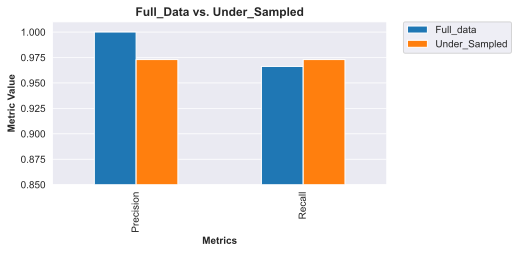

In [51]:
undersample_df = pd.DataFrame(index=['Precision', 'Recall'], columns=['Full_data', 'Under_Sampled'])
undersample_df.loc['Precision', 'Full_data'] = metricsSet2.loc['Precision', 'Multi_NB']
undersample_df.loc['Recall', 'Full_data'] = metricsSet2.loc['Recall', 'Multi_NB']
undersample_df.loc['Precision', 'Under_Sampled'] = precisionVal
undersample_df.loc['Recall', 'Under_Sampled'] = recallVal


plotComparison_df(undersample_df, xLabel = 'Metrics', yLabel = 'Metric Value', xRotation=0, yRange=(0.85, 1.01), title='Full_Data vs. Under_Sampled')
plt.savefig(imageDirectory + '\\img_undersample_bar.png', dpi=140, bbox_inches='tight')

### Insight:
- By applying undersampling of major class, indeed we add more importance to the minor class(in this example spam messages)
- Because of that we see an improvement in recall metric, while in contrast the precision value has been decreased.
- **Do we need to apply undersampling?**
    - To answer we have to take into account our **business goal** to find which class is more important.
    - Major class or minor class?
    - In this example (spam message classifier), we need to detect ham messages correctly as much as possible. So precision is more important for us. And we do not compromise on precision metrics.
    - But for instance, in case of fraud transaction detection, the recall metric has noticeably more importance; So in a case study of fraud detection, undersampling of major class is clearly preferable if it can lead to increasing Recall score. But not in our study of the spam message classifier.

## Final Model
- Trainging on all dataset without train test splitting
- Saving model into disk
- Loading model from disk and test

In [52]:
X = df['message']
y = df['target']

steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2), token_pattern=r'\b\w+\b')), 
         ('nb', MultinomialNB(alpha=0.85))]
finalModel = Pipeline(steps)
finalModel.fit(X, y);

# Saving model to disk:
fileName = modelDirectory + "\\model.sav"
pickle.dump(finalModel, open(fileName, 'wb'))

Prediction: Normal Message


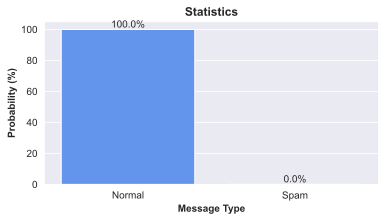

In [53]:
# Loading model from disk:
path = "D:\Python_DS\Jupyter\Spam_Classifier\model\model.sav"
loaded_model = pickle.load(open(path, 'rb'))

txt2 = ['Hello, how are you doing']
resNumeric = loaded_model.predict(txt2)
probLst = loaded_model.predict_proba(txt2)[0]
probLst *= 100

if(resNumeric == 1):
    res = 'Spam Message'
else:
    res= 'Normal Message'

typeLst = ['Normal', 'Spam']
print('Prediction: {}'.format(res))
make_bar_plot(X=typeLst, y=probLst, title='Statistics', xlbl='Message Type', ylbl='Probability (%)', xRotation = 0, annotation=True)